# Data visualization

Notebook created to visualize the transforms on the batches and observe the prediction by the network

In [1]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch
from torch import nn
from torch.utils.data import DataLoader
from custom_tranforms import RandomZoom, AddRandomBackground
import matplotlib.pyplot as plt
from utils import plot_batch, calculate_loss_and_accuracy, classes
from FruitModel import FruitModel

Object `DataLoader` not found.


In [2]:
# Loading pretrained model

model = FruitModel()
model.load_state_dict(torch.load('models/fruit_light_net.pt')['state_dict'])
model = model.cuda()
model = model.eval()

In [3]:
validation_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation((-45, 45), fill=255),
    RandomZoom((-40, 20)),
    AddRandomBackground((180, 220)),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor()
])

NameError: name 'RandomZoom' is not defined

In [ ]:
rows, columns = 3, 3

In [ ]:
validation_data = ImageFolder('fruits-360/Test', validation_transforms)

In [ ]:
validation_loader = DataLoader(validation_data, batch_size=rows*columns, num_workers=0, shuffle=True)

In [ ]:
batch, labels = next(iter(validation_loader))

In [9]:
labels_to_text = [classes[x] for x in labels]
_, idx = torch.topk(model(batch.cuda()), 1)
pred_to_text = [classes[x] for x in idx]

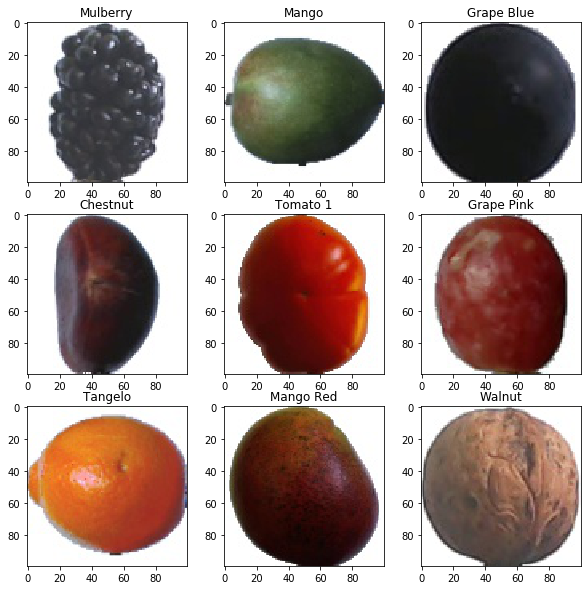

In [12]:
permuted = batch.permute(0, 2, 3, 1)
fig = plt.figure(figsize=(11, 11))
for i in range(1, columns*rows + 1):
    img = permuted[i-1]
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text("{}/{}".format(pred_to_text[i-1], labels_to_text[i-1]))
    plt.imshow(img)

In [13]:
batch.shape

torch.Size([9, 3, 100, 100])